### Cherenkov Radiation
Charged particles radiate when travelling faster than light in a medium. This is because the region of non-zero field grows with time, so it occurs even when the particle is in uniform motion.
In contrast, if the particle moves slower than the speed of light in the medium, it can't outrun its own electromagnetic field.
<img src="cherenkov.png" style="height:300px;">
To change the properties of the plot, adjust the function `R(T)` and the evaluation time, `time`, near the bottom of the program. This code won't handle superluminal velocities on curved paths since the potential is computed from only the most recent point on the particle's worldline which satisfies the lightcone condition.

In [1]:
#NAME: Cherenkov Radiation
#DESCRIPTION: Investigating the radiation produced by a particle moving faster than light in a medium.

import numpy as np
from numpy import linalg as la

#speed of light in medium
cn = 1.0
#charge of particle
q = 1.0

#time discretisation
dt = 0.005
Nsteps = 200
t = [dt*i for i in range(Nsteps)]

#space discretisation
dx = 0.01
N = 100
x = np.linspace(-0.5*N*dx, 0.5*N*dx, N)
y = np.linspace(-0.5*N*dx, 0.5*N*dx, N)

#discretisation error
square_error = dt**2 + 2*(dx/cn)**2

#define particle position in xy plane
def R(T):
    #particle at rest at (0,0) for T<0
    X = 0.0
    Y = 0.0
    if T >= 0:
        X = min(x) + 1.0*T**2
        Y = max(y) - 1.0*T**2
    return np.array([X,Y])

To find the electric scalar potential at a given position and time, we search the worldline of the particle to find emission times satisfying the lightcone condition. 
For general time-varying charge distributions it can be calculated using the retarded potential

$$\phi(\vec{r}, t) = \int \frac{\rho(\vec{r}, t - \frac{|\vec{r}-\vec{R}|}{c})}{|\vec{r}-\vec{R}|} d^3\vec{R}.$$

In [2]:
#find the difference between time and space
#interval for obversation and emission.
#off_worldline=0 is the lightcone condition.
def off_worldline(emission_time, position, time):
    return (time - emission_time - la.norm(position - R(emission_time))/cn)**2

#for a given position and time, find the time
#at which the received radiation was emitted
def get_emission_time(position,time):
    emission_time = 0.0
    #check all emission times < time in reverse order
    for T in (t[0:t.index(time)])[::-1]:
        ow = off_worldline(T, position, time)
        if (ow < square_error):
            emission_time = T
            break
    return emission_time

#calculate the scalar potential
def get_phi(position, time):
    T = get_emission_time(position, time)
    return q/(4.0*np.pi*la.norm(position - R(T)))
    
#scalar potential
phi = np.zeros((N,N))
time = t[-1]
it = np.nditer(phi, ['multi_index'])
for element in it:
    i,j = it.multi_index
    position = np.array([x[j],y[i]])
    phi[i,j] = get_phi(position, time)

Particles satisfying the Cherenkov condition (i.e. travelling faster than light does) emit cones of radiation around their paths. The angle at which the radiation is emitted is
$$cos\theta = \frac{1}{n \beta},$$
where $\beta = \nu/c$ and $\nu$ is the particle speed. Since refractive index is a function of wavelength, different wavelengths are emitted in different directions. Also, for a given particle speed, the Cherenkov condition may be satisfied for only a finite range of wavelengths. This often gives it a characteristic colour.
<img src="cherenkov2.jpg" style="height:300px;">
In the above image, only the wavelengths indicated by the blue shading are emitted by the particle.

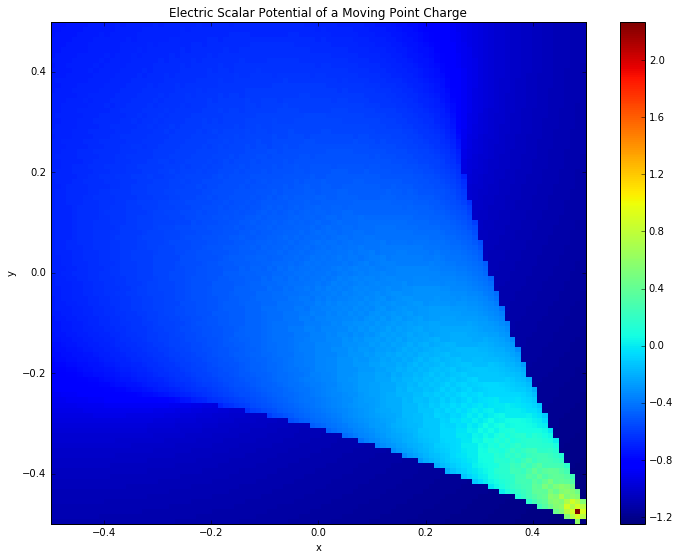

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

#plot the electric scalar potential
fig = plt.figure(figsize = (12,9))
plt.pcolor(x,y,np.log10(phi), cmap = 'jet')
plt.xlim(min(x), max(x))
plt.ylim(min(y), max(y))
plt.xlabel('x')
plt.ylabel('y')
plt.title("Electric Scalar Potential of a Moving Point Charge")
plt.colorbar()
plt.show()

The particle in the plot started at rest in the top left and accelerated under a constant force to the bottom right. It was initially subliminal, so there is no Cherenkov cone there. Instead, the field is diffuse as for a charge at rest. Once the charge had a speed greater than $c/n$, any emitted radiation was confined to the Cherenkov cone, as in the bottom right.

The transition between these two regimes created the gradual gathering of radiation into a cone.